# Objective
This notebook shows the spot images and parameters generated on 19 July 2018 and ready for worker annotations.

In [1]:
from SpotImage import SpotImage

### These parameters are the same for all images in this batch.

In [2]:
cmap = 'gray'
img_sz = 300
patch_sz = 11
spot_sigma = 1.75
spot_shape_params = ['2D_Gauss', spot_sigma]
snr_sigma = 2.5
snr_threshold = 3

# no brightness biasing in this batch
brightness_bias = False     
brightness_bias_dial = 0
biasing_method = None
global_intensity_dial = 0   

# plot and save all spot arrays and spot images in this batch.
plot_spots = True
plot_img = True
save_spots = True
save_img = True

### These parameters vary.

In [3]:
bg_img_filename_list = ['MAX_C3-ISP_300_1.tif', 'MAX_ISP_300_1.tif']	# one cell image, one tissue image
num_spots_list = [50, 100, 150]
snr_mu_list = [5, 10, 20]

### Generate spot images.

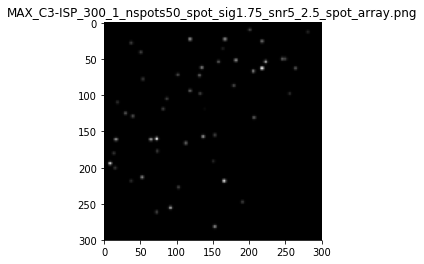

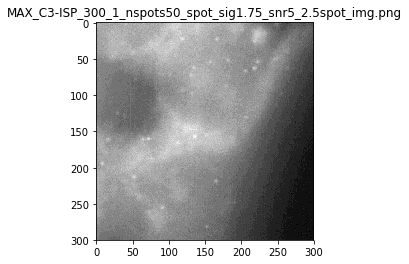

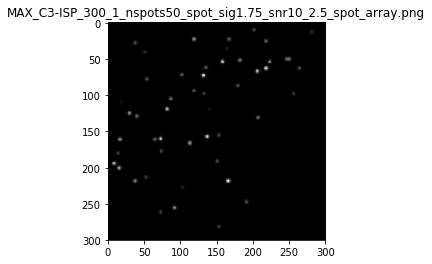

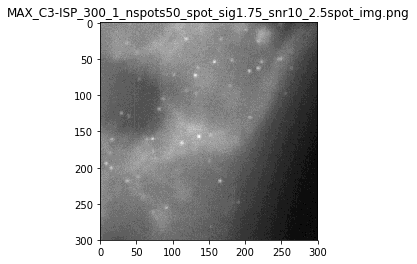

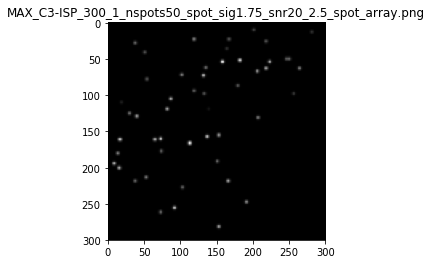

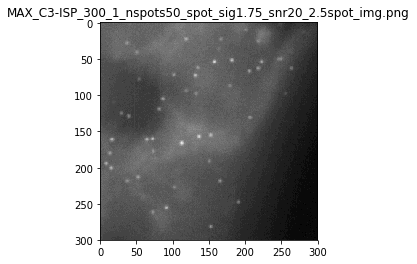

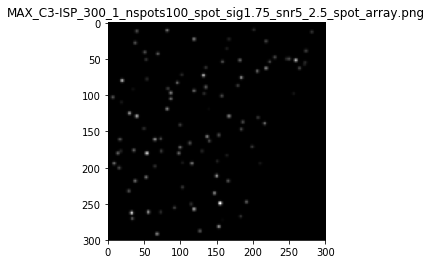

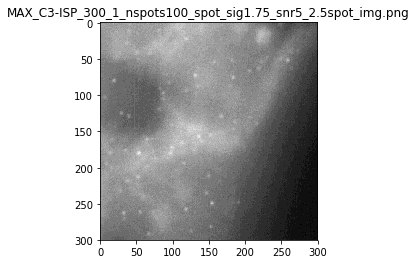

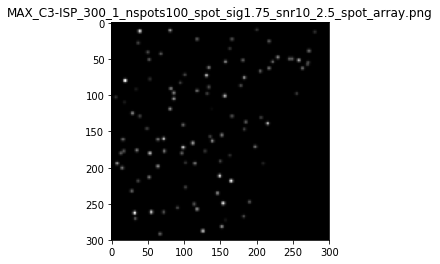

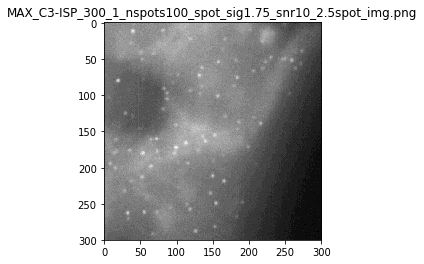

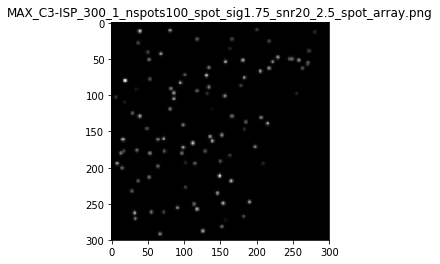

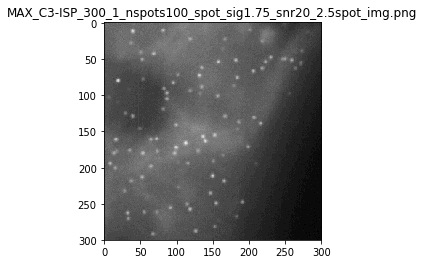

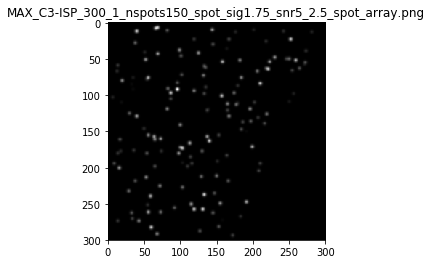

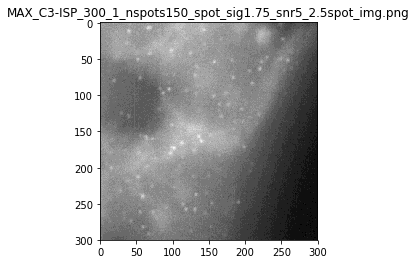

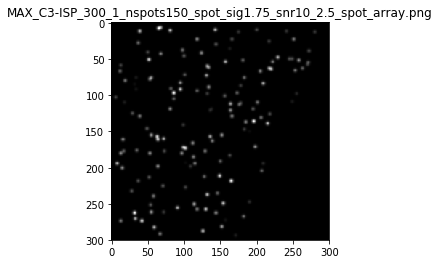

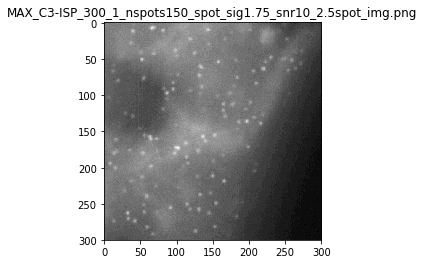

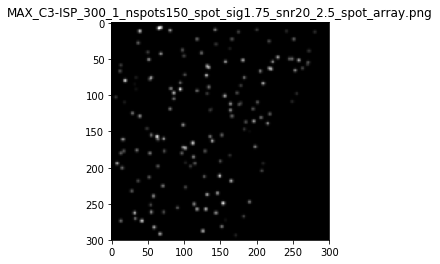

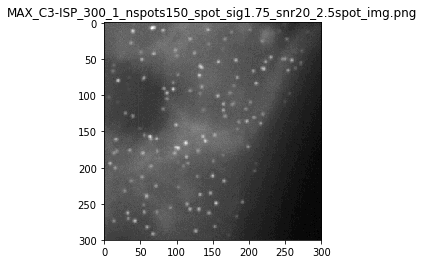

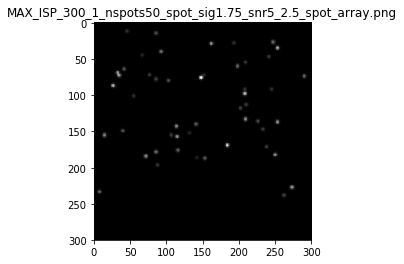

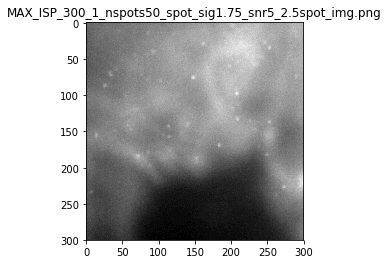

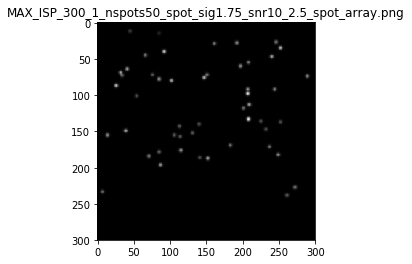

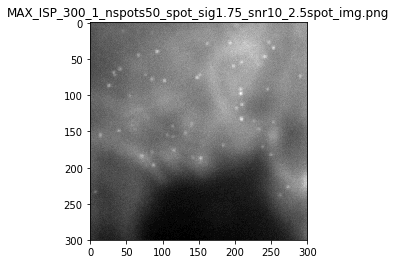

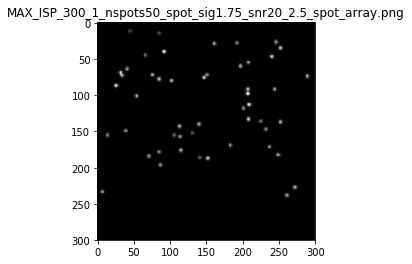

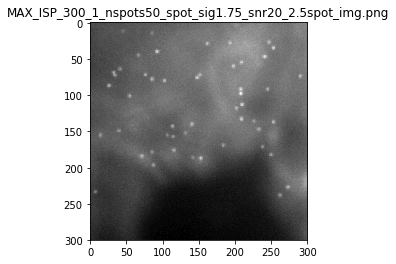

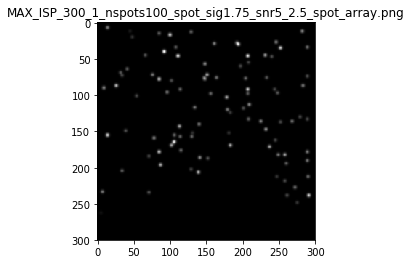

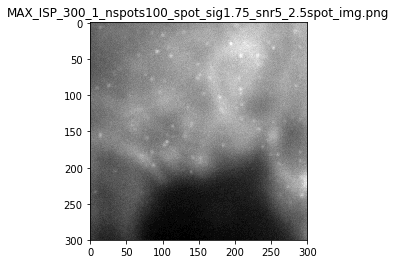

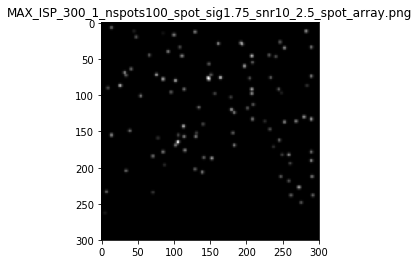

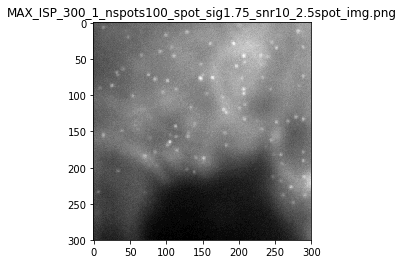

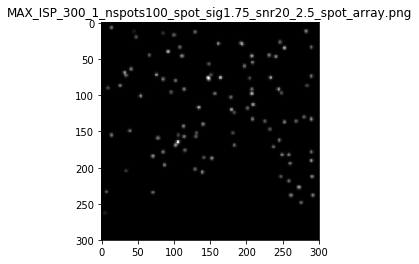

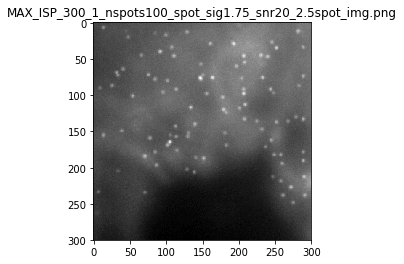

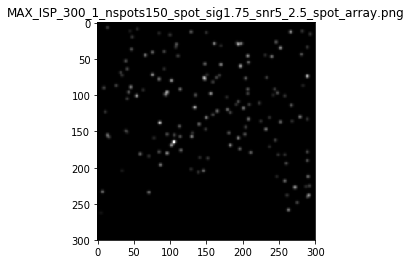

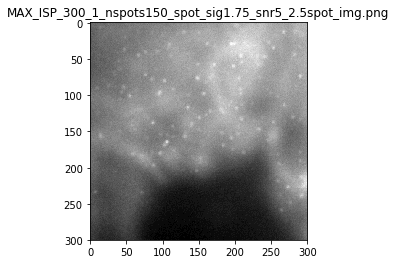

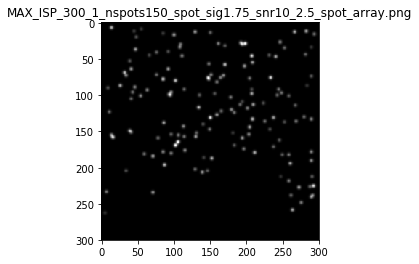

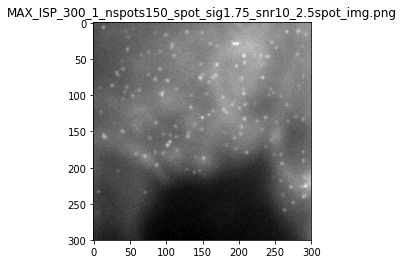

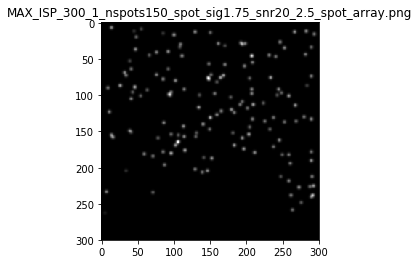

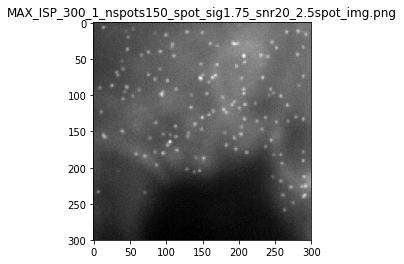

In [4]:
for bg_img_filename in bg_img_filename_list:
    
    si = SpotImage(bg_img_filename, cmap, img_sz, patch_sz, spot_shape_params, brightness_bias, brightness_bias_dial, biasing_method, global_intensity_dial)

    for num_spots in num_spots_list:
        for snr_mu in snr_mu_list:  
            
            snr_distr_params = ['Gauss', snr_mu, snr_sigma]
            spots_filename = "".join(bg_img_filename.rsplit(bg_img_filename[-4:])) + "_nspots" + str(num_spots) + "_spot_sig" + str(spot_sigma) + "_snr" + str(snr_mu) + "_" + str(snr_sigma) + "_spot_array.png"
            spot_img_filename = "".join(bg_img_filename.rsplit(bg_img_filename[-4:])) + "_nspots" + str(num_spots) + "_spot_sig" + str(spot_sigma) + "_snr" + str(snr_mu) + "_" + str(snr_sigma) + "spot_img.png"
            csv_filename = "".join(bg_img_filename.rsplit(bg_img_filename[-4:])) + "_nspots" + str(num_spots) + "_spot_sig" + str(spot_sigma) + "_snr" + str(snr_mu) + "_" + str(snr_sigma) + "_coord_snr_list.csv"

            si.generate_spot_image(num_spots, snr_distr_params, snr_threshold, plot_spots, plot_img, save_spots, spots_filename, save_img, spot_img_filename)
            si.get_coord_snr_list_csv(csv_filename)